In [9]:
import numpy as np

class SimpleLinearRegression():
    def __init__(self):
        self.coefficient = None
        self.intercept = None

    def fit(self, X_train, y_train):
        X_mean = np.mean(X_train)
        y_mean = np.mean(y_train)

        self.coefficient  = np.dot((X_train - X_mean).T, y_train - y_mean)/np.dot((X_train - X_mean).T, X_train - X_mean)
        self.intercept = y_mean - self.coefficient * X_mean

    def predict(self, X_test):
        return self.coefficient * X_test + self.intercept

In [10]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data[:, np.newaxis, 2]  # Selecting a single feature for simplicity
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of SimpleLinearRegression
model = SimpleLinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict using the testing data
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE) using scikit-learn's mean_squared_error function
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate R-squared using scikit-learn's r2_score function
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

Mean Squared Error: 4061.8259284949268
R-squared: 0.23335039815872138


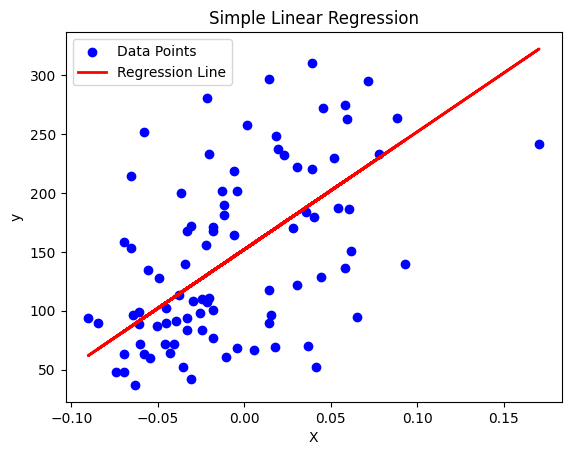

In [11]:
import matplotlib.pyplot as plt
# Plot the data points and regression line
plt.scatter(X_test, y_test, color='blue', label='Data Points')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()